In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x245d6cab400>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x245d36347c0>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date

('2017-08-23',)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores

last_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago ).all()
last_year


#Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df= pd.DataFrame(last_year, columns=["Date", "precipitation"])
last_year_df

,Date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


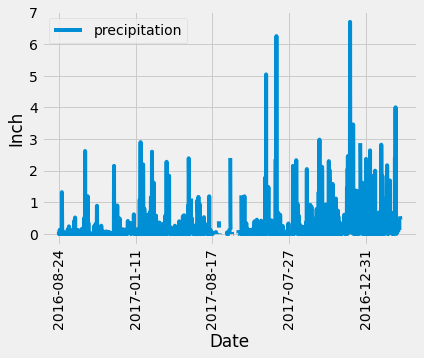

In [19]:
last_year_df= last_year_df.set_index("Date")
last_year_df

# Sort the dataframe by date

last_year_df.sort_index()

#last_year_df= last_year_df.rename(columns={1 : "Precipitation"})


# Use Pandas Plotting with Matplotlib to plot the data

last_year_df.plot().tick_params(axis="x", labelrotation= 90)

plt.xlabel("Date")
plt.ylabel("Inch")

plt.show()

In [21]:
#last_year_df.to_dict()

{'Precipitation': {'2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': nan,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-07': 0.01,
 

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data

last_year_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station).count()


9

In [26]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
#session.query(Station.name).all()

In [17]:
# station id with the highest number of observations
most_active_sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

print(most_active_sta)

('USC00519281', 2772)


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
minTemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_sta[0]).first()
maxTemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_sta[0]).first()
avgTemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_sta[0]).first()
print(f"The minimum tempreture of station USC00519281 is {minTemp[0]}")
print(f"The maximum tempreture of station USC00519281 is {maxTemp[0]}")
print(f"The average tempreture of station USC00519281 is {avgTemp[0]}")


The minimum tempreture of station USC00519281 is 54.0
The maximum tempreture of station USC00519281 is 85.0
The average tempreture of station USC00519281 is 71.66378066378067


In [29]:
session.query(Measurement.tobs).filter(Measurement.station == most_active_sta[0]).all()

[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


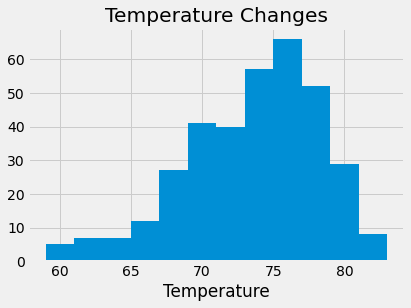

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_most_active_sta = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > one_year_ago).filter(Measurement.station == most_active_sta[0]).all()

last_year_most_active_df= pd.DataFrame(last_year_most_active_sta, columns=['date', 'tobs'])
last_year_most_active_df.head()

last_year_most_active_df.hist(bins=12)
plt.title("Temperature Changes")
plt.xlabel('Temperature')
plt.show()

# Close session

In [20]:
# Close Session
session.close()